<a href="https://colab.research.google.com/github/Daeijavad/Deep-Learning/blob/main/HW5_VGG19TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Convolutional Neural Networks

Welcome to HomeWork 5 of the course! In this notebook, you will:

- Implement a CNN model from the scratch for image classification.
- Use a pretrained model and Transfer learning to solve above classification problem.

As usual, we will start by loading the packages.

In [ ]:
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
# Feel free to add pakages depending of your selected frame work. 

Then, we load the dataset:

In [ ]:
def load_dataset():
    tf = tarfile.open("/content/drive/My Drive/Colab Notebooks/dataset.tar.gz")
    tf.extractall()
    
    train_dataset = pd.read_csv('data/train.csv')
    test_dataset = pd.read_csv('data/test.csv')
    
    X_train = convert_x_data(train_dataset.values[:, 1])
    X_test = convert_x_data(test_dataset.values[:, 1])
    
    Y_train = train_dataset.values[:, 0]
    Y_test = test_dataset.values[:, 0]
        
    X_train = X_train.reshape((X_train.shape[0], 1, 48, 48))
    X_test = X_test.reshape((X_test.shape[0], 1, 48, 48))
    
    return X_train, Y_train, X_test, Y_test

def convert_x_data(X_data) :
    x = np.zeros((X_data.shape[0], 48*48))
    for ix in range(x.shape[0]):
        p = X_data[ix].split(' ')
        for iy in range(x.shape[1]):
            x[ix, iy] = int(p[iy])
    return x

Run the next cell to load the dataset you are going to use.

In [ ]:
# Loading the data
X_train, Y_train, X_test, Y_test = load_dataset()

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

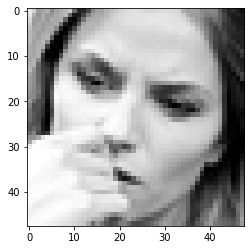

In [ ]:
ix = 2;
plt.figure(ix)
plt.imshow(X_train[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

From now implemnt your model. After that use transfer learning.
Please add cells and explain yours developing steps and your results.

# Model Architecture
> we used VGG19 and after that we added 4 fully connected layers and a softmax layer


*note: it's important to make the pretrained model, untrainable*

in the model summary we see that the VGG19 parameters are non-trainable

In [ ]:
import keras
from keras import Sequential
from keras.layers import Flatten, Dense, BatchNormalization, Dropout

model = Sequential()
# load mobilenet model
model.add(keras.applications.vgg19.VGG19(input_shape=(48, 48, 3), include_top=False, weights='imagenet'))

# making mobilenet layer untrainable
model.layers[0].trainable = False

# add fully connected trainable layers
model.add(Flatten())

model.add(Dense(2048, activation='relu', kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(512, activation='relu', kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu', kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(7, activation='softmax'))

model.summary()

Using TensorFlow backend.













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               10490

In [ ]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

# data preprocessing

### first we normalize the data

In [ ]:
_mean = np.mean(X_train, axis=0)
_var  = np.std(X_train, axis=0)

X_train = (X_train - _mean) / _var
X_test = (X_test - _mean) / _var

### second we make Y categorical

In [ ]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### third we change grayscale data into RGB format

In [ ]:
X_train = np.repeat(X_train, 3, axis=1).reshape((X_train.shape[0], 48, 48,3))
X_test  = np.repeat(X_test, 3, axis=1).reshape((X_test.shape[0], 48, 48,3))

# model fitting and plot

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=256,
          epochs=40,
          verbose=1,
          validation_data=(X_test, Y_test),
          shuffle=True,
          use_multiprocessing=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 28709 samples, validate on 3588 samples
Epoch 1/40
28709/28709 [==============================] - 16s 547us/step - loss: 2.2488 - acc: 0.1862 - val_loss: 1.8750 - val_acc: 0.2497
Epoch 2/40
28709/28709 [==============================] - 11s 376us/step - loss: 1.9707 - acc: 0.2285 - val_loss: 1.8007 - val_acc: 0.2765
Epoch 3/40
28709/28709 [==============================] - 11s 377us/step - loss: 1.8754 - acc: 0.2495 - val_loss: 1.7723 - val_acc: 0.2832
Epoch 4/40
28709/28709 [==============================] - 11s 379us/step - loss: 1.8199 - acc: 0.2680 - val_loss: 1.7548 - val_acc: 0.2979
Epoch 5/40
28709/28709 [==============================] - 11s 381us/step - loss: 1.7894 - acc: 0.2786 - val_loss: 1.7285 - val_acc: 0.3027
Epoch 6/40
28709/28709 [==============================] - 11s 382us/step - loss: 1.7614 - acc: 0.2895 - val_loss: 1.7188 - val_acc: 0.3043
Epoch 7/40
28709/2870

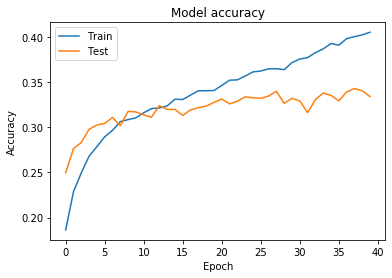

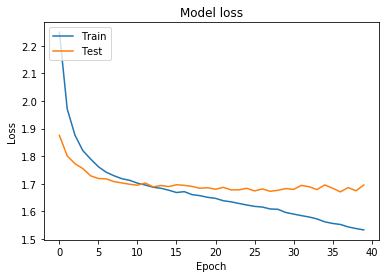

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()